In [1]:
## Exploring algorithms for UFC project
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV , Lasso , LassoCV 

In [2]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p = p+'UFCDiffdata.csv'


df = pd.read_csv(p)
df = df.drop(['Unnamed: 0'],axis = 1)
print(df.shape)
df.head(3)

(7780, 89)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,Result
0,0.0,0.000000,0.200000,-0.010000,0.000000,-0.380000,1.000000,0.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,Loss
1,0.0,-0.960938,-0.238047,-0.092422,0.007031,0.134766,0.007812,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Loss
2,-0.5,0.625000,0.071250,0.031250,0.162500,-0.343750,-0.875000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Win


In [3]:
df['weight_class_WomenStrawweight'].value_counts()

0    7520
1     260
Name: weight_class_WomenStrawweight, dtype: int64

In [4]:
# removing rows that contain NaN
df.dropna(inplace=True)
print(df.shape)
df.head(3)
print(df.isnull().sum().sum())

(7780, 89)
0


In [5]:
# test train split
(df_train,df_test) = train_test_split(df, train_size = 0.8)

X_train = df_train.drop('Result',axis=1)
y_train = df_train.Result

X_test = df_test.drop('Result',axis=1)
y_test = df_test.Result

X = X_train
y = y_train

print(X.isnull().sum().sum())

0


In [6]:
X_train.head(3)

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch
173,0.000000,0.000000,-0.014646,-0.179966,0.537593,-0.175571,0.873779,-0.006104,-0.529297,-0.072510,...,0,1,0,1,0,0,0,1,0,0
6400,0.241501,0.494141,-0.181724,-0.214280,-0.210835,-0.191799,-0.266999,-0.968911,-0.501190,0.092758,...,0,0,0,1,0,0,0,1,0,0
2170,-0.060669,-0.378906,0.130284,-0.042007,0.231558,0.339592,2.005234,-0.157181,-0.031250,0.000000,...,1,0,0,1,0,0,0,1,0,0


In [7]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [8]:
# one hot encode
X_cat = pd.get_dummies(X_cat)
print(X_cat['title_bout'].value_counts())
X_cat.head(3)


False    5820
True      404
Name: title_bout, dtype: int64


,title_bout
173,False
6400,False
2170,False


In [9]:
# finding columns that are all zeros from X_num
cols = pd.Series(X_num.columns)
for i in range(len(cols)):
    if (X_num.iloc[:,i] == 0).all():
        print(cols[i])

In [10]:
# removing columns of zeros
#X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [11]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [12]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)

In [13]:
X.head()

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
173,0.000000,0.000000,-0.014646,-0.179966,0.537593,-0.175571,0.873779,-0.006104,-0.529297,-0.072510,...,1,0,1,0,0,0,1,0,0,False
6400,0.241501,0.494141,-0.181724,-0.214280,-0.210835,-0.191799,-0.266999,-0.968911,-0.501190,0.092758,...,0,0,1,0,0,0,1,0,0,False
2170,-0.060669,-0.378906,0.130284,-0.042007,0.231558,0.339592,2.005234,-0.157181,-0.031250,0.000000,...,0,0,1,0,0,0,1,0,0,False
1590,0.000000,0.000000,-0.240000,0.110000,-0.500000,0.270000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,False
4607,0.093262,0.975586,-0.079561,0.066855,-0.059033,0.221133,0.937500,0.187500,-0.005859,0.246582,...,0,0,1,0,0,0,1,0,0,False


In [14]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X,y)

C:\Users\walkowae\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [15]:
# Training score
print('Training R2:',logr.score(X,y).round(2))

Training R2: 0.62


## Finding Test Error

In [16]:
X_train = X
y_train = y

In [17]:
X = X_test
y = y_test

In [18]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [19]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [20]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [21]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)
X.head()

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
2787,1.000000,0.312500,-0.148594,0.136504,0.689258,-0.176953,-1.808594,-0.132812,0.187500,-0.007812,...,0,0,1,0,0,0,1,0,0,False
3409,0.265625,0.093750,0.110937,0.029648,-0.023438,-0.053750,0.000000,0.003906,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,False
925,0.841797,0.000000,0.073691,-0.029160,-0.225352,-0.075742,-0.804688,-0.578125,-1.375000,-0.611328,...,0,0,1,0,0,0,0,1,0,False
1176,0.187370,0.499641,-0.050245,0.002632,0.015764,-0.185399,-0.011658,-0.245788,0.000000,-0.125488,...,0,0,1,0,0,0,1,0,0,False
3360,-0.531250,-0.000488,0.085236,0.091222,0.336331,-0.012852,1.138428,-0.082397,-0.070312,-0.093872,...,0,0,1,0,0,0,1,0,0,False


In [22]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train,y_train)

C:\Users\walkowae\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [23]:
# Test score
print('Test R2:',logr.score(X,y).round(2))

Test R2: 0.59


## Feature Selection

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
X_test = X
y_test = y

In [26]:
# LASSO to find insignificant features to drop
grid = {'C':[0.01, 0.1, 1, 10, 100]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=grid,n_jobs=-1)
gs_model.fit(X_train, y_train)
# TAKES ROUGHLY 6 MINUTES TO RUN!!!

GridSearchCV(estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [42]:
gs_model.best_params_.get('C')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [28]:
# Train a LR model with best parameters
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [31]:
# viewing coefficients after LASSO
print(model.classes_)
coef = model.coef_[2]
coef

['Draw' 'Loss' 'Win']


array([ 0.06520348, -0.00859345,  0.        , -0.1440541 ,  0.        ,
       -0.20974417,  0.01247558,  0.        , -0.04747969,  0.        ,
        0.02294201, -0.0195928 , -0.00292217,  0.        , -0.03955541,
        0.03887306,  0.00901063, -0.01004707,  0.0535069 ,  0.02406397,
        0.04499866,  0.08776548,  0.01262721, -0.00518458, -0.00606543,
        0.00400455,  0.        ,  0.        ,  0.00710375, -0.01255414,
        0.03282412, -0.02779673, -0.00224069,  0.        ,  0.        ,
        0.        , -0.00258051,  0.        ,  0.01379249, -0.02310002,
       -0.0231718 ,  0.02077403,  0.0227133 , -0.02867013,  0.00440701,
       -0.00453069, -0.00058427, -0.00208961,  0.00093045,  0.0085335 ,
        0.02261028,  0.01814083,  0.        ,  0.05166441, -0.00998069,
       -0.03319279,  0.        , -0.13752369,  0.02108303,  0.        ,
        0.04358384, -0.01113272, -0.01168827,  0.01557026,  0.00828337,
       -0.05878395,  0.        ,  0.        ,  0.        ,  0.  

In [32]:
# storing coefficients and feature name in data frame
coef_df = pd.DataFrame()
coef_df['features'] = X_train.columns
coef_df['coefficient'] = coef
print(coef_df.shape)
print(coef_df.iloc[0,1])
coef_df.head()

(88, 2)
0.06520347722266948


,features,coefficient
0,DIFF_avg_KD,0.065203
1,DIFF_avg_opp_KD,-0.008593
2,DIFF_avg_SIG_STR_pct,0.000000
3,DIFF_avg_opp_SIG_STR_pct,-0.144054
4,DIFF_avg_TD_pct,0.000000


In [33]:
# remove features with zero coefficients
coef_df = coef_df[coef_df['coefficient'] != 0]
coef_df = coef_df.sort_values(by=['coefficient'],ascending=False)

print(coef_df.shape)
coef_df.head()

(56, 2)


,features,coefficient
21,DIFF_avg_opp_TD_landed,0.087765
0,DIFF_avg_KD,0.065203
18,DIFF_avg_TD_att,0.053507
53,DIFF_longest_win_streak,0.051664
20,DIFF_avg_opp_TD_att,0.044999


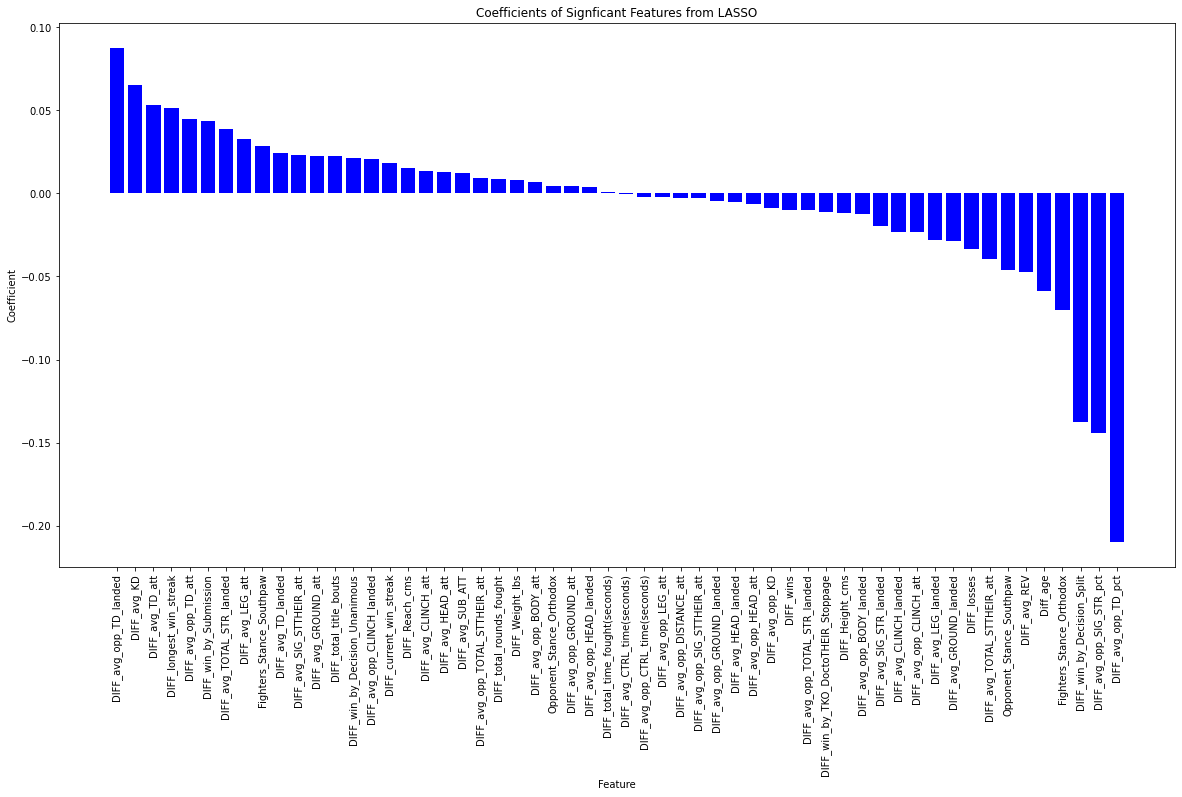

In [34]:
# plot coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar('features', 'coefficient', data = coef_df, color = "blue")
plt.xlabel("Feature")
plt.xticks(rotation = 90)
plt.ylabel("Coefficient")
plt.title("Coefficients of Signficant Features from LASSO")
plt.show()

In [38]:
# removing insifnificant features from X
X_train_imp = X_train[coef_df.features]
X_test_imp = X_test[coef_df.features]
X_train_imp.head(3)

,DIFF_avg_opp_TD_landed,DIFF_avg_KD,DIFF_avg_TD_att,DIFF_longest_win_streak,DIFF_avg_opp_TD_att,DIFF_win_by_Submission,DIFF_avg_TOTAL_STR_landed,DIFF_avg_LEG_att,Fighters_Stance_Southpaw,DIFF_avg_TD_landed,...,DIFF_avg_GROUND_landed,DIFF_losses,DIFF_avg_TOTAL_STTHEIR_att,Opponent_Stance_Southpaw,DIFF_avg_REV,Diff_age,Fighters_Stance_Orthodox,DIFF_win_by_Decision_Split,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_opp_TD_pct
173,-1.033691,0.000000,2.009766,1,-0.324463,0,11.593994,0.282715,0,1.652100,...,-2.750000,-7,27.786865,0,-0.529297,-8,1,-2,-0.179966,-0.175571
6400,-2.315558,0.241501,1.539173,-1,-4.805519,-1,-8.653122,-2.296377,0,-0.389773,...,-5.720907,-1,10.619433,0,-0.501190,-4,1,1,-0.214280,-0.191799
2170,1.032104,-0.060669,-0.781113,-1,0.488937,-2,72.352402,1.494125,0,0.344788,...,21.244690,-3,49.071747,0,-0.031250,2,1,0,-0.042007,0.339592


In [39]:
##X_train_imp.to_csv('LGRimpFeaturesOnlyUFC.csv')

In [36]:
# Rerunning Logistic Regression with reduced feature set
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train_imp,y_train)

C:\Users\walkowae\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [40]:

print('Train R2:',logr.score(X_train_imp,y_train).round(2))
print('Test R2:',logr.score(X_test_imp,y_test).round(2))

Train R2: 0.61
Test R2: 0.6


In [78]:
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE

PC-1     0.680893
PC-2     0.146913
PC-3     0.117139
PC-4     0.023825
PC-5     0.017472
PC-6     0.002597
PC-7     0.002468
PC-8     0.001377
PC-9     0.001190
PC-10    0.001048
dtype: float64

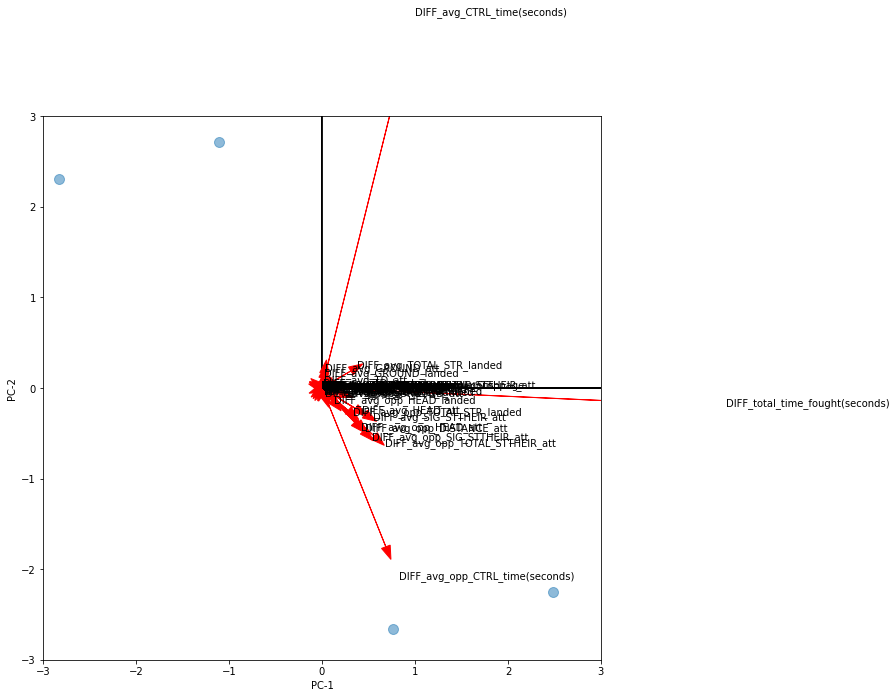

In [79]:
biplot(X_train_imp,10,1,2,scale=4,alpha=.5,s=100)

In [138]:



model = PCA(n_components=25).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df1 = pd.DataFrame(dic.items(), columns =['PC','Label'])
df1

,PC,Label
0,PC0,DIFF_total_time_fought(seconds)
1,PC1,DIFF_avg_CTRL_time(seconds)
2,PC2,DIFF_avg_opp_CTRL_time(seconds)
3,PC3,DIFF_total_time_fought(seconds)
4,PC4,DIFF_avg_opp_TOTAL_STTHEIR_att
5,PC5,DIFF_avg_TOTAL_STR_landed
6,PC6,DIFF_avg_opp_TOTAL_STR_landed
7,PC7,DIFF_avg_HEAD_att
8,PC8,DIFF_total_rounds_fought
9,PC9,DIFF_total_rounds_fought


In [139]:
PVE = model.explained_variance_ratio_
PVE = pd.Series(PVE)

PVEtop10 = PVE.sort_values(ascending=False)[:25]
df1['Value'] = PVEtop10
#.plot.barh()
df1

,PC,Label,Value
0,PC0,DIFF_total_time_fought(seconds),0.671245
1,PC1,DIFF_avg_CTRL_time(seconds),0.146538
2,PC2,DIFF_avg_opp_CTRL_time(seconds),0.122756
3,PC3,DIFF_total_time_fought(seconds),0.024530
4,PC4,DIFF_avg_opp_TOTAL_STTHEIR_att,0.018553
5,PC5,DIFF_avg_TOTAL_STR_landed,0.003113
6,PC6,DIFF_avg_opp_TOTAL_STR_landed,0.002514
7,PC7,DIFF_avg_HEAD_att,0.001442
8,PC8,DIFF_total_rounds_fought,0.001393
9,PC9,DIFF_total_rounds_fought,0.001246


<BarContainer object of 30 artists>

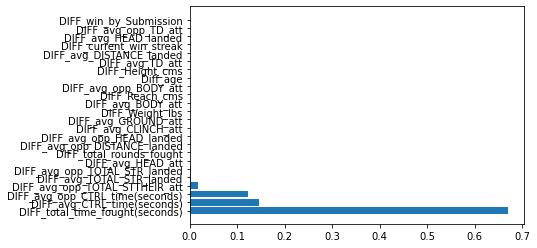

In [140]:
import matplotlib.pyplot as plt
Best10 = pd.Series(df1.Value,df1.Label)
plt.barh(df1.Label, df1.Value)


In [141]:
# removing insifnificant features from X




X_train_imp = X_train[df1.Label]
X_test_imp = X_test[df1.Label]
X_train_imp.head(3)

,DIFF_total_time_fought(seconds),DIFF_avg_CTRL_time(seconds),DIFF_avg_opp_CTRL_time(seconds),DIFF_total_time_fought(seconds),DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_TOTAL_STR_landed,DIFF_avg_opp_TOTAL_STR_landed,DIFF_avg_HEAD_att,DIFF_total_rounds_fought,DIFF_total_rounds_fought,...,Diff_age,DIFF_Height_cms,DIFF_avg_TD_att,DIFF_avg_DISTANCE_landed,DIFF_current_win_streak,DIFF_avg_opp_DISTANCE_landed,DIFF_avg_HEAD_landed,DIFF_avg_opp_TD_att,DIFF_avg_opp_HEAD_landed,DIFF_win_by_Submission
173,-154.277344,33.114014,-137.302734,-154.277344,-13.066895,11.593994,-25.544922,2.590576,-30,-30,...,-8,-2.54,2.009766,13.101807,2,-14.862793,-11.025635,-0.324463,-17.032959,0
6400,-92.437376,-37.749987,-377.360401,-92.437376,-1.673864,-8.653122,-25.139278,20.744547,-14,-14,...,-4,-7.62,1.539173,0.969915,-1,16.750847,-1.111175,-4.805519,3.261256,-1
2170,254.103622,274.731827,77.691254,254.103622,-36.370209,72.352402,-6.641403,-3.196899,-9,-9,...,2,20.32,-0.781113,-9.779297,1,-19.666794,15.446960,0.488937,-25.508041,-2


In [142]:
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train_imp,y_train)
print('Train R2:',logr.score(X_train_imp,y_train).round(2))
print('Test R2:',logr.score(X_test_imp,y_test).round(2))

Train R2: 0.6
Test R2: 0.59


C:\Users\walkowae\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
print(logr.classes_)
logr.coef_

['Draw' 'Loss' 'Win']


array([[-0.00023331,  0.00015831,  0.00011128, -0.00023331,  0.00423888,
         0.0012322 , -0.00614926,  0.0004254 , -0.00124729, -0.00124729,
        -0.00236615,  0.00601975,  0.00055077, -0.00311714, -0.00146361,
        -0.00146361,  0.00452414,  0.00055077,  0.00652173, -0.00171144,
         0.0027717 ,  0.00429629,  0.00774605, -0.00647346,  0.03285756],
       [-0.00014466,  0.00022147,  0.00040291, -0.00014466, -0.00205706,
         0.00210642,  0.0043496 ,  0.00167082, -0.00084557, -0.00084557,
         0.00357529,  0.00022337, -0.00268731, -0.00810391, -0.00127497,
        -0.00127497,  0.00351891, -0.00268731, -0.0117055 ,  0.00330451,
         0.02985819,  0.00354355, -0.02627435, -0.00670359, -0.04434743],
       [ 0.00037797, -0.00037978, -0.00051419,  0.00037797, -0.00218183,
        -0.00333863,  0.00179967, -0.00209622,  0.00209287,  0.00209287,
        -0.00120914, -0.00624312,  0.00213654,  0.01122106,  0.00273858,
         0.00273858, -0.00804306,  0.00213654,  0

## Ridge Regression

In [34]:
grid = {'alpha':[0.01,0.1,1,10,100]}
ridge = Ridge()
ridgeCV = GridSearchCV(ridge,param_grid = grid , return_train_score = True)
ridgeCV.fit(X_train,y_train)

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

ValueError: could not convert string to float: 'Loss'

In [36]:
X_train.head(10)

,Unnamed: 0,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
4961,0.479727,1.757542,-0.015263,0.041997,-0.575464,-0.987931,0.021374,-0.658896,0.010799,-0.604308,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,False
6886,1.337749,-1.231348,-0.011827,0.491127,0.634517,0.451903,0.198590,-0.389254,-0.038129,0.573036,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,1.932895,-0.184070,False
3474,-0.183068,0.372673,0.473810,0.370630,0.021917,1.146037,0.044702,-0.084348,0.549468,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,True
2073,-0.807530,0.494892,-0.002664,-0.433807,1.248630,0.603490,1.292702,-0.367160,1.097892,-0.294000,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,False
1449,-1.085663,-0.244925,-1.175522,2.690887,2.679686,1.260889,-0.549507,0.410573,0.001044,-0.878109,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,False
5875,0.887120,0.001681,-0.002664,1.165142,-1.191203,2.865872,-1.525360,-0.013645,0.001044,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,-0.517276,5.431856,False
6338,1.093491,0.001681,-2.348381,-0.252721,0.748151,-2.464967,-1.525360,-0.013645,-2.506038,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,-0.517276,5.431856,False
6036,0.958882,-1.477954,-0.002664,-0.366382,0.916281,0.867703,1.855546,0.940846,-0.155649,-0.001946,...,-0.18731,-0.043948,-1.774494,-0.513281,5.634962,-0.040112,-1.752942,-0.517276,5.431856,False
5849,0.875531,1.804936,0.076366,-0.796996,0.194404,1.232427,0.250889,0.018181,0.234887,0.326615,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,True
3377,-0.226304,0.001681,-1.615344,0.232743,-1.343693,-0.297522,-1.803900,-0.437863,-0.312341,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,1.932895,-0.184070,False
